In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read training dataset
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            1000 non-null   object 
 1   Device_ID            1000 non-null   object 
 2   Temp_Sensor          1000 non-null   float64
 3   Vibration_Level      1000 non-null   float64
 4   Voltage_Fluctuation  1000 non-null   float64
 5   Signal_Strength      1000 non-null   float64
 6   Runtime_Hours        1000 non-null   int64  
 7   Error_Code           1000 non-null   int64  
 8   Vibration_Rolling3   1000 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 70.4+ KB


In [3]:
# correct Timestamp datatype
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:
# checking for null values or incorrect datatypes for correction
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            1000 non-null   datetime64[ns]
 1   Device_ID            1000 non-null   object        
 2   Temp_Sensor          1000 non-null   float64       
 3   Vibration_Level      1000 non-null   float64       
 4   Voltage_Fluctuation  1000 non-null   float64       
 5   Signal_Strength      1000 non-null   float64       
 6   Runtime_Hours        1000 non-null   int64         
 7   Error_Code           1000 non-null   int64         
 8   Vibration_Rolling3   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 70.4+ KB


In [5]:
# looking over sample data
df.head()

,Timestamp,Device_ID,Temp_Sensor,Vibration_Level,Voltage_Fluctuation,Signal_Strength,Runtime_Hours,Error_Code,Vibration_Rolling3
0,2025-01-01 00:00:00,DVC-009,73.71,0.87,0.047,89.7,34,0,0.87
1,2025-01-01 00:10:00,DVC-007,71.40,0.76,0.053,87.6,51,0,0.76
2,2025-01-01 00:20:00,DVC-006,72.35,1.12,0.060,86.0,40,0,1.12
3,2025-01-01 00:30:00,DVC-001,72.26,0.51,0.054,86.1,80,0,0.51
4,2025-01-01 00:40:00,DVC-005,72.09,1.13,0.062,86.7,92,0,1.13


In [6]:
# descriptive statistics
df.describe()

,Timestamp,Temp_Sensor,Vibration_Level,Voltage_Fluctuation,Signal_Strength,Runtime_Hours,Error_Code,Vibration_Rolling3
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2025-01-04 11:15:00,73.673120,0.866030,0.146320,50.637360,2899.312000,0.257000,0.865953
min,2025-01-01 00:00:00,66.850000,0.210000,0.025000,-33.391888,11.000000,0.000000,0.440000
25%,2025-01-02 17:37:30,71.961374,0.710000,0.092900,33.925158,1409.500000,0.000000,0.759167
50%,2025-01-04 11:15:00,73.645000,0.860000,0.136644,53.251718,2862.500000,0.000000,0.866667
75%,2025-01-06 04:52:30,75.284499,1.020000,0.187633,71.413813,4234.500000,1.000000,0.966667
max,2025-01-07 22:30:00,84.150812,1.570000,0.360191,99.500000,6930.000000,1.000000,1.396667
std,NaN,2.488162,0.225511,0.068494,25.762344,1736.613412,0.437198,0.154698


In [7]:
df.columns

Index(['Timestamp', 'Device_ID', 'Temp_Sensor', 'Vibration_Level',
       'Voltage_Fluctuation', 'Signal_Strength', 'Runtime_Hours', 'Error_Code',
       'Vibration_Rolling3'],
      dtype='object')

In [8]:
# order columns in preffered way
df = df[['Timestamp', 'Device_ID', 'Temp_Sensor', 'Vibration_Level',
       'Voltage_Fluctuation', 'Signal_Strength', 'Runtime_Hours', 'Vibration_Rolling3', 'Error_Code']]

In [9]:
df.head()

,Timestamp,Device_ID,Temp_Sensor,Vibration_Level,Voltage_Fluctuation,Signal_Strength,Runtime_Hours,Vibration_Rolling3,Error_Code
0,2025-01-01 00:00:00,DVC-009,73.71,0.87,0.047,89.7,34,0.87,0
1,2025-01-01 00:10:00,DVC-007,71.40,0.76,0.053,87.6,51,0.76,0
2,2025-01-01 00:20:00,DVC-006,72.35,1.12,0.060,86.0,40,1.12,0
3,2025-01-01 00:30:00,DVC-001,72.26,0.51,0.054,86.1,80,0.51,0
4,2025-01-01 00:40:00,DVC-005,72.09,1.13,0.062,86.7,92,1.13,0


In [10]:
# Checking uniqueness of Devices
df['Device_ID'].value_counts()

Device_ID
DVC-008    124
DVC-007    118
DVC-010    114
DVC-002    104
DVC-009     98
DVC-005     92
DVC-001     90
DVC-004     90
DVC-003     88
DVC-006     82
Name: count, dtype: int64

In [11]:
# Correlation between numeric varibles and between target variable
corr = df.corr(numeric_only=True)

In [12]:
corr

,Temp_Sensor,Vibration_Level,Voltage_Fluctuation,Signal_Strength,Runtime_Hours,Vibration_Rolling3,Error_Code
Temp_Sensor,1.000000,-0.007594,0.362275,-0.309854,0.231028,-0.035438,0.070647
Vibration_Level,-0.007594,1.000000,-0.007981,-0.029362,0.101868,0.683380,0.091683
Voltage_Fluctuation,0.362275,-0.007981,1.000000,-0.536627,0.669312,-0.029962,0.129847
Signal_Strength,-0.309854,-0.029362,-0.536627,1.000000,-0.762834,-0.037304,-0.169991
Runtime_Hours,0.231028,0.101868,0.669312,-0.762834,1.000000,0.139983,0.185470
Vibration_Rolling3,-0.035438,0.683380,-0.029962,-0.037304,0.139983,1.000000,0.029231
Error_Code,0.070647,0.091683,0.129847,-0.169991,0.185470,0.029231,1.000000


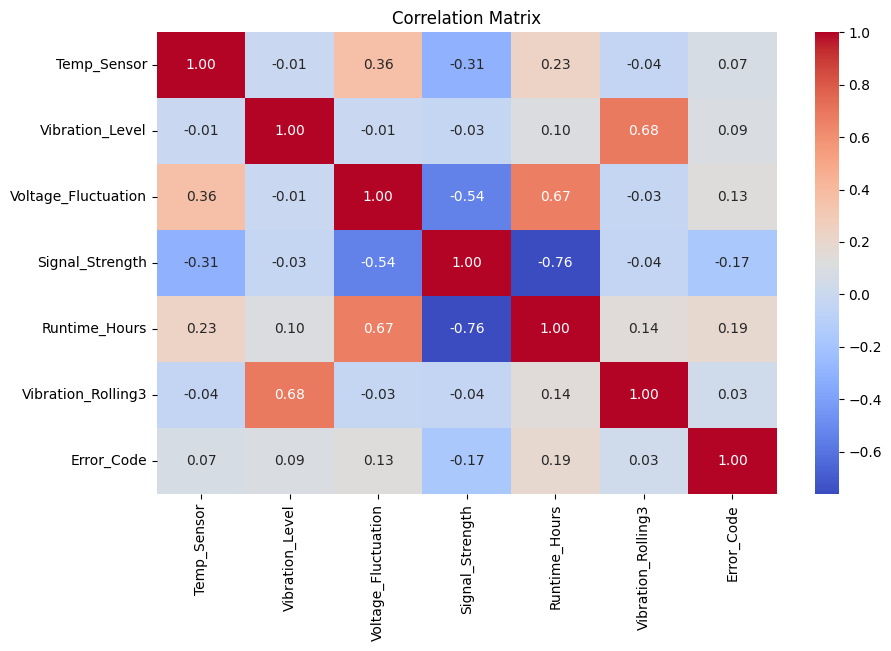

In [13]:
# Heatmap for better understanding
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

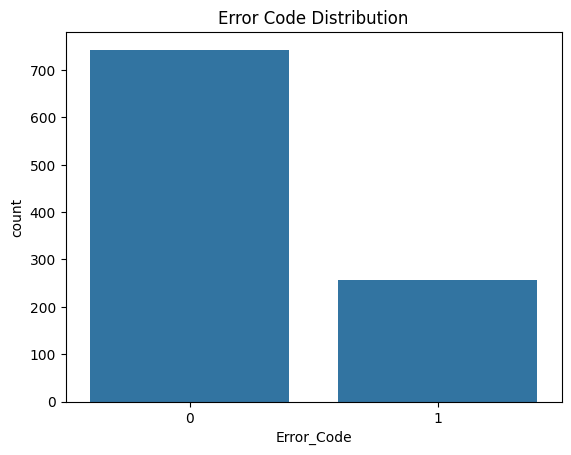

In [14]:
# checking target variable for balance/imbalance
sns.countplot(data=df, x='Error_Code')
plt.title("Error Code Distribution")
plt.show()

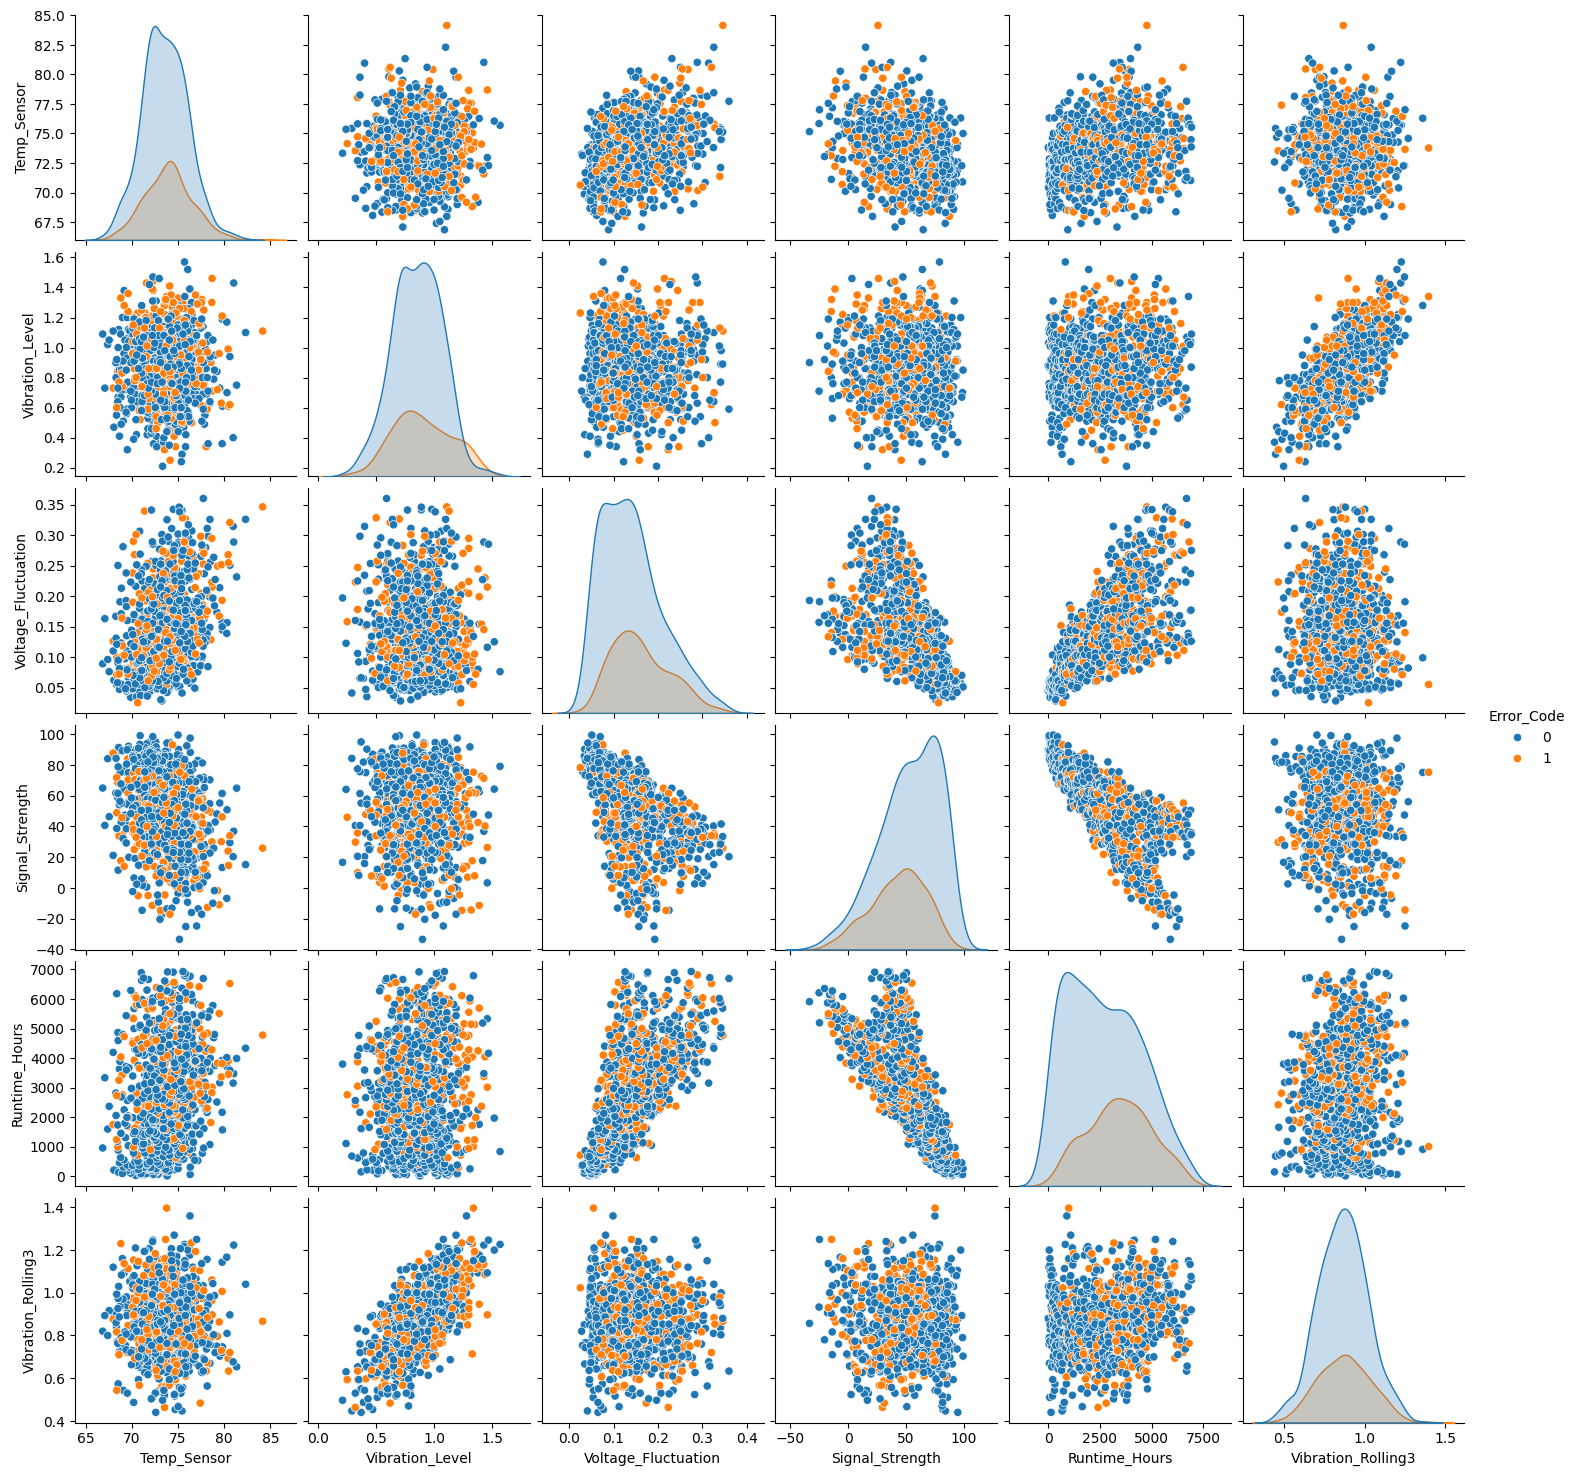

In [15]:
# Checking distribution and vizualize correlation
sns.pairplot(df, hue='Error_Code')

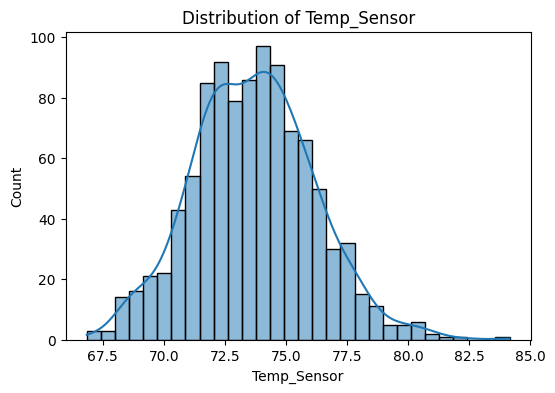

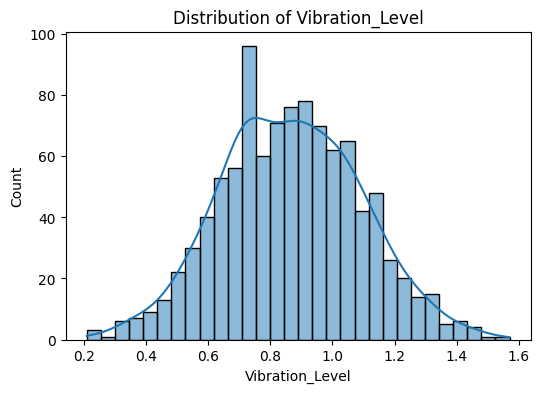

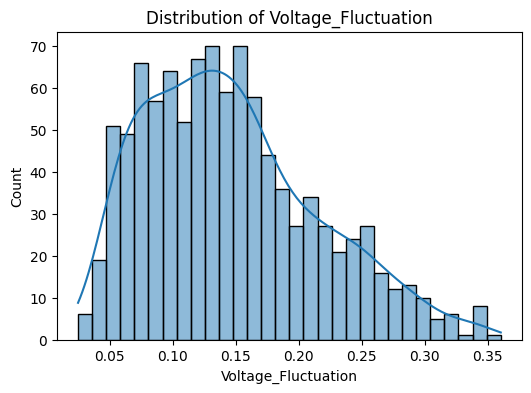

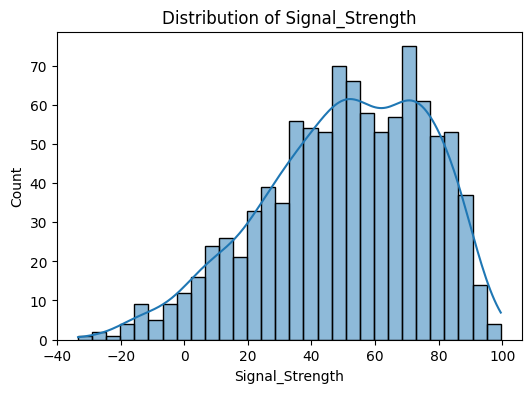

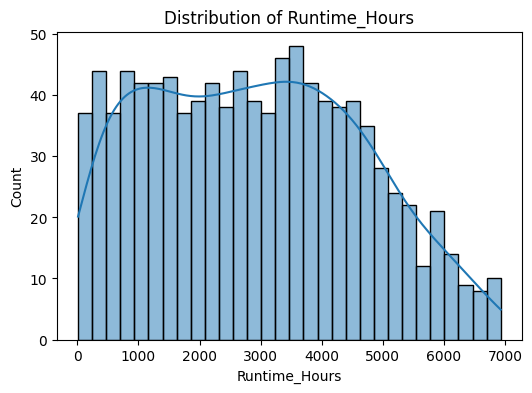

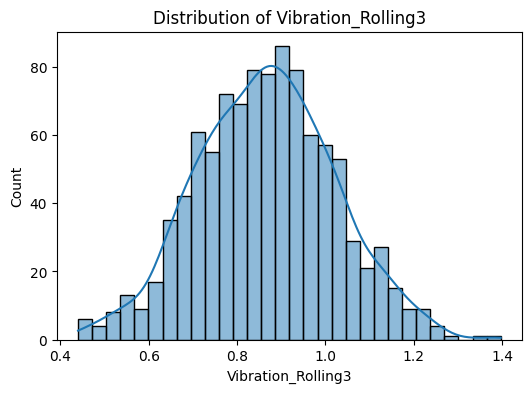

In [16]:
# Checking distribution of each value
numerical_features = ['Temp_Sensor', 'Vibration_Level', 'Voltage_Fluctuation',
                      'Signal_Strength', 'Runtime_Hours', 'Vibration_Rolling3']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()


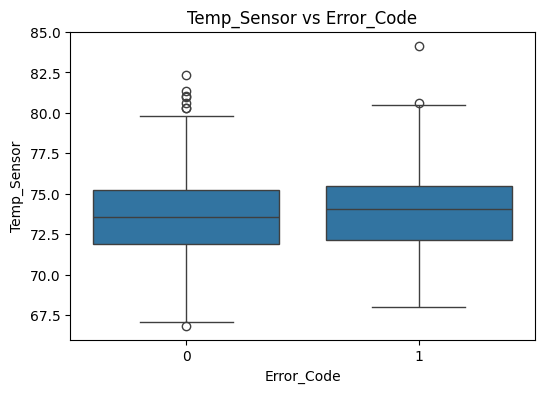

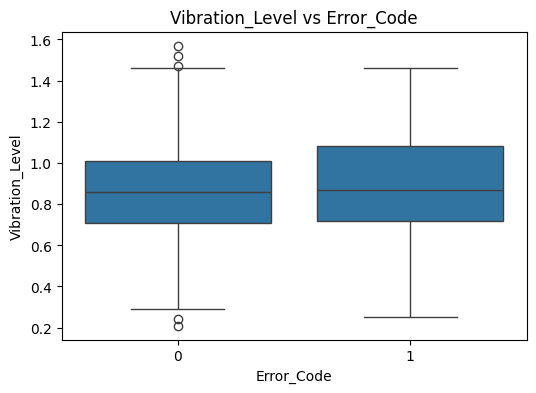

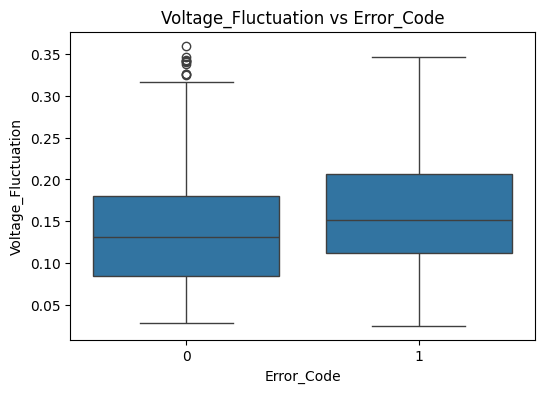

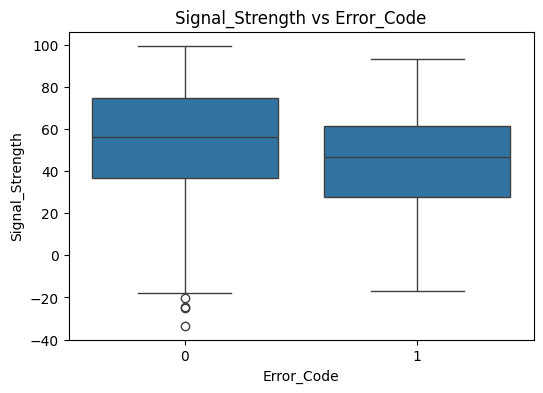

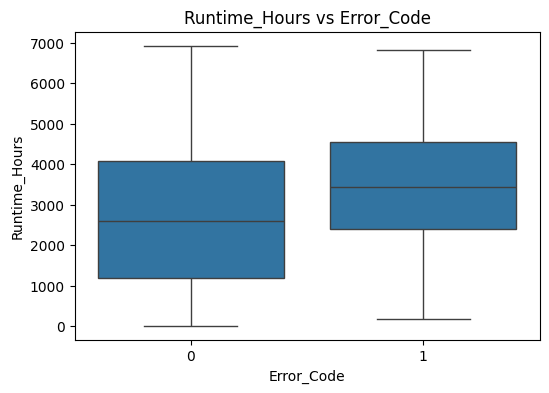

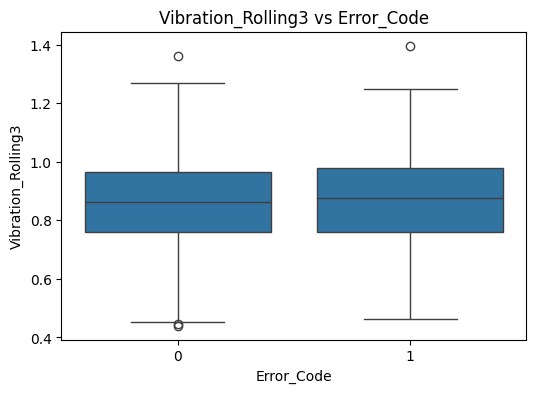

In [17]:
# checking for outliers and overlap between error codes
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Error_Code', y=feature, data=df)
    plt.title(f"{feature} vs Error_Code")
    plt.show()


## as we see through this vizualizations
## only three features are somewhat showing correlation with target variable
### 1. Voltage_Fluctuation	
### 2. Signal_Strength	
### 3. Runtime_Hours
### and that is very low also


## and also we cant find any feature which is separating based on target variable clearly

### this suggest we have to use non-linear algorithms to model and find complex patterns
### or we have to do feature engineering for uncovering complex patterns

# experimenting with logistic regression model with feature engg and without feature engg. for evaluation 

In [18]:
# split dataset in dependent and independent variables
X = df.iloc[:, 2:-1]
y = df['Error_Code']

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# Scaling all the features in similar range
log_scaler = StandardScaler()
X_scaled = log_scaler.fit_transform(X)

In [21]:
X_scaled

array([[ 0.0148297 ,  0.01761327, -1.45079303,  1.51702756, -1.65076793,
         0.02617154],
       [-0.91403087, -0.47041196, -1.36314985,  1.43547245, -1.64097387,
        -0.68524585],
       [-0.53203194,  1.12676154, -1.26089947,  1.37333523, -1.6473112 ,
         1.64302922],
       ...,
       [-0.81752588,  0.6387363 ,  0.06835544, -0.41311002,  0.91412512,
        -0.2540838 ],
       [ 0.07514532,  0.01761327, -0.29682448, -0.61505601,  2.3158288 ,
         0.34954307],
       [-0.7129788 ,  2.45773947,  1.17850241, -1.27526403,  1.31741019,
         1.88016835]])

In [22]:
#necessary libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
# building logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

In [24]:
# Checking accuracy and reports
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.755
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       149
           1       1.00      0.04      0.08        51

    accuracy                           0.76       200
   macro avg       0.88      0.52      0.47       200
weighted avg       0.82      0.76      0.66       200

Confusion Matrix:
 [[149   0]
 [ 49   2]]


## we can see that accuracy of this model is good but
## recall and f1 score of class 1(minority) are very low 
## as there is imbalanced dataset there is more values with 0 error code
## and less values with 1 error code
## because of this model is predicting more often as 0

### to overcome this we can experiment smote technique to oversample minority class

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
# dataset is imbalanced using smote for oversampling minor values
sm = SMOTE(random_state=1)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

In [27]:
# Splitting dataset in train test splits
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y_resampled)

In [28]:
# again building model after smote
sm_log_model = LogisticRegression()
sm_log_model.fit(X_train, y_train)

y_pred = sm_log_model.predict(X_test)

In [29]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.59

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.56      0.58       149
           1       0.59      0.62      0.61       149

    accuracy                           0.59       298
   macro avg       0.59      0.59      0.59       298
weighted avg       0.59      0.59      0.59       298

Confusion Matrix:
 [[84 65]
 [56 93]]


## now as we use smote it balances dataset with synthetic data
## recall and f1 score is improved but the accuracy of model is dropped
## as there is no linear relation and logistic regression is not able to uncover complex patterns

## to uncover complex patterns between features we can improve dataset
## by feature engineering 

In [30]:
# creating features through datetime Timestamp
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Day'] = df['Timestamp'].dt.day
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [31]:
df

,Timestamp,Device_ID,Temp_Sensor,Vibration_Level,Voltage_Fluctuation,Signal_Strength,Runtime_Hours,Vibration_Rolling3,Error_Code,Hour,Minute,Day,DayOfWeek,IsWeekend
0,2025-01-01 00:00:00,DVC-009,73.710000,0.87,0.047000,89.700000,34,0.870000,0,0,0,1,2,0
1,2025-01-01 00:10:00,DVC-007,71.400000,0.76,0.053000,87.600000,51,0.760000,0,0,10,1,2,0
2,2025-01-01 00:20:00,DVC-006,72.350000,1.12,0.060000,86.000000,40,1.120000,0,0,20,1,2,0
3,2025-01-01 00:30:00,DVC-001,72.260000,0.51,0.054000,86.100000,80,0.510000,0,0,30,1,2,0
4,2025-01-01 00:40:00,DVC-005,72.090000,1.13,0.062000,86.700000,92,1.130000,0,0,40,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-01-07 21:50:00,DVC-003,75.338408,0.60,0.141791,10.117563,4806,0.550000,0,21,50,7,1,0
996,2025-01-07 22:00:00,DVC-001,73.119421,0.90,0.252546,9.814935,4364,0.863333,0,22,0,7,1,0
997,2025-01-07 22:10:00,DVC-006,71.640000,1.01,0.151000,40.000000,4486,0.826667,1,22,10,7,1,0
998,2025-01-07 22:20:00,DVC-007,73.860000,0.87,0.126000,34.800000,6919,0.920000,0,22,20,7,1,0


In [32]:
# Adding rolling mean of Temp_Sensor and rolling standard deviation of Vibration_Level over 1 hour as features
df['Temp_Rolling3'] = df['Temp_Sensor'].rolling(window=6, min_periods=1).mean()
df['Vibration_Rolling_Std3'] = df['Vibration_Level'].rolling(window=6, min_periods=1).std()

In [33]:
df

,Timestamp,Device_ID,Temp_Sensor,Vibration_Level,Voltage_Fluctuation,Signal_Strength,Runtime_Hours,Vibration_Rolling3,Error_Code,Hour,Minute,Day,DayOfWeek,IsWeekend,Temp_Rolling3,Vibration_Rolling_Std3
0,2025-01-01 00:00:00,DVC-009,73.710000,0.87,0.047000,89.700000,34,0.870000,0,0,0,1,2,0,73.710000,NaN
1,2025-01-01 00:10:00,DVC-007,71.400000,0.76,0.053000,87.600000,51,0.760000,0,0,10,1,2,0,72.555000,0.077782
2,2025-01-01 00:20:00,DVC-006,72.350000,1.12,0.060000,86.000000,40,1.120000,0,0,20,1,2,0,72.486667,0.184481
3,2025-01-01 00:30:00,DVC-001,72.260000,0.51,0.054000,86.100000,80,0.510000,0,0,30,1,2,0,72.430000,0.253048
4,2025-01-01 00:40:00,DVC-005,72.090000,1.13,0.062000,86.700000,92,1.130000,0,0,40,1,2,0,72.362000,0.260519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-01-07 21:50:00,DVC-003,75.338408,0.60,0.141791,10.117563,4806,0.550000,0,21,50,7,1,0,73.099732,0.130077
996,2025-01-07 22:00:00,DVC-001,73.119421,0.90,0.252546,9.814935,4364,0.863333,0,22,0,7,1,0,73.111877,0.127227
997,2025-01-07 22:10:00,DVC-006,71.640000,1.01,0.151000,40.000000,4486,0.826667,1,22,10,7,1,0,72.639665,0.149800
998,2025-01-07 22:20:00,DVC-007,73.860000,0.87,0.126000,34.800000,6919,0.920000,0,22,20,7,1,0,73.194821,0.141374


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               1000 non-null   datetime64[ns]
 1   Device_ID               1000 non-null   object        
 2   Temp_Sensor             1000 non-null   float64       
 3   Vibration_Level         1000 non-null   float64       
 4   Voltage_Fluctuation     1000 non-null   float64       
 5   Signal_Strength         1000 non-null   float64       
 6   Runtime_Hours           1000 non-null   int64         
 7   Vibration_Rolling3      1000 non-null   float64       
 8   Error_Code              1000 non-null   int64         
 9   Hour                    1000 non-null   int32         
 10  Minute                  1000 non-null   int32         
 11  Day                     1000 non-null   int32         
 12  DayOfWeek               1000 non-null   int32    

In [35]:
# fill null values with 0 of rolling standard deviation of Vibration_level
df['Vibration_Rolling_Std3'] = df['Vibration_Rolling_Std3'].fillna(0)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               1000 non-null   datetime64[ns]
 1   Device_ID               1000 non-null   object        
 2   Temp_Sensor             1000 non-null   float64       
 3   Vibration_Level         1000 non-null   float64       
 4   Voltage_Fluctuation     1000 non-null   float64       
 5   Signal_Strength         1000 non-null   float64       
 6   Runtime_Hours           1000 non-null   int64         
 7   Vibration_Rolling3      1000 non-null   float64       
 8   Error_Code              1000 non-null   int64         
 9   Hour                    1000 non-null   int32         
 10  Minute                  1000 non-null   int32         
 11  Day                     1000 non-null   int32         
 12  DayOfWeek               1000 non-null   int32    

In [37]:
# creating features to uncover complex relation between independent variables
df['Temp_x_Vibration'] = df['Temp_Sensor'] * df['Vibration_Level']
df['Signal_per_Runtime'] = df['Signal_Strength'] / (df['Runtime_Hours'] + 1)

In [38]:
df.columns

Index(['Timestamp', 'Device_ID', 'Temp_Sensor', 'Vibration_Level',
       'Voltage_Fluctuation', 'Signal_Strength', 'Runtime_Hours',
       'Vibration_Rolling3', 'Error_Code', 'Hour', 'Minute', 'Day',
       'DayOfWeek', 'IsWeekend', 'Temp_Rolling3', 'Vibration_Rolling_Std3',
       'Temp_x_Vibration', 'Signal_per_Runtime'],
      dtype='object')

In [39]:
df = df[['Timestamp', 'Device_ID', 'Temp_Sensor', 'Vibration_Level',
       'Voltage_Fluctuation', 'Signal_Strength', 'Runtime_Hours',
       'Vibration_Rolling3', 'Hour', 'Minute', 'Day',
       'DayOfWeek', 'IsWeekend', 'Temp_Rolling3', 'Vibration_Rolling_Std3',
       'Temp_x_Vibration', 'Signal_per_Runtime',  'Error_Code']]

In [40]:
df

,Timestamp,Device_ID,Temp_Sensor,Vibration_Level,Voltage_Fluctuation,Signal_Strength,Runtime_Hours,Vibration_Rolling3,Hour,Minute,Day,DayOfWeek,IsWeekend,Temp_Rolling3,Vibration_Rolling_Std3,Temp_x_Vibration,Signal_per_Runtime,Error_Code
0,2025-01-01 00:00:00,DVC-009,73.710000,0.87,0.047000,89.700000,34,0.870000,0,0,1,2,0,73.710000,0.000000,64.127700,2.562857,0
1,2025-01-01 00:10:00,DVC-007,71.400000,0.76,0.053000,87.600000,51,0.760000,0,10,1,2,0,72.555000,0.077782,54.264000,1.684615,0
2,2025-01-01 00:20:00,DVC-006,72.350000,1.12,0.060000,86.000000,40,1.120000,0,20,1,2,0,72.486667,0.184481,81.032000,2.097561,0
3,2025-01-01 00:30:00,DVC-001,72.260000,0.51,0.054000,86.100000,80,0.510000,0,30,1,2,0,72.430000,0.253048,36.852600,1.062963,0
4,2025-01-01 00:40:00,DVC-005,72.090000,1.13,0.062000,86.700000,92,1.130000,0,40,1,2,0,72.362000,0.260519,81.461700,0.932258,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-01-07 21:50:00,DVC-003,75.338408,0.60,0.141791,10.117563,4806,0.550000,21,50,7,1,0,73.099732,0.130077,45.203045,0.002105,0
996,2025-01-07 22:00:00,DVC-001,73.119421,0.90,0.252546,9.814935,4364,0.863333,22,0,7,1,0,73.111877,0.127227,65.807479,0.002249,0
997,2025-01-07 22:10:00,DVC-006,71.640000,1.01,0.151000,40.000000,4486,0.826667,22,10,7,1,0,72.639665,0.149800,72.356400,0.008915,1
998,2025-01-07 22:20:00,DVC-007,73.860000,0.87,0.126000,34.800000,6919,0.920000,22,20,7,1,0,73.194821,0.141374,64.258200,0.005029,0


In [41]:
# split dataset in dependent and independent variables
X = df.iloc[:, 2:-1]
y = df['Error_Code']

In [42]:
# Scaling all the features in similar range
fe_scaler = StandardScaler()
X_scaled = fe_scaler.fit_transform(X)

In [43]:
# dataset is imbalanced using smote for oversampling minor values
sm = SMOTE(random_state=1)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y_resampled)

In [45]:
# again building model after feature engg.
fe_log_model = LogisticRegression()
fe_log_model.fit(X_train, y_train)

y_pred = fe_log_model.predict(X_test)

In [46]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70       149
           1       0.70      0.77      0.73       149

    accuracy                           0.71       298
   macro avg       0.72      0.71      0.71       298
weighted avg       0.72      0.71      0.71       298

Confusion Matrix:
 [[ 99  50]
 [ 35 114]]


### As there is no linear relation between dependent and independent variables 
### using linear model like logistic regression is less effective 
### we can improve accuracy using non-linear models like random forest
### so we move to a random forest model which will uncover non - linear patterns

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# train test split for random forest model
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=1, 
                                                    stratify=y
)

In [49]:
# building random forest model
rf_model = RandomForestClassifier(
    n_estimators=5,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

In [50]:
# fit model on train-test split
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [51]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6633333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       223
           1       0.31      0.26      0.28        77

    accuracy                           0.66       300
   macro avg       0.54      0.53      0.53       300
weighted avg       0.64      0.66      0.65       300


Confusion Matrix:
 [[179  44]
 [ 57  20]]


## as we can see the accuracy of this model is average
## but precision recall and f1 score for class 1 is very poor 
## to improve this we can experiment with parameters of random forest
## using hyperparameter tuning through grid search CV

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
# Hyper-parameter tuning for finding best parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

In [54]:
rf = RandomForestClassifier(random_state=1)

In [55]:
# GridSearchCV setup
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='f1_macro',
                           verbose=2)

In [56]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro', verbose=2)

In [57]:
best_rf = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)

Best Parameters:
 {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [58]:
y_pred = best_rf.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       223
           1       0.52      0.44      0.48        77

    accuracy                           0.75       300
   macro avg       0.67      0.65      0.66       300
weighted avg       0.74      0.75      0.74       300

Confusion Matrix:
 [[191  32]
 [ 43  34]]


## as the data shows after hyper parameter tuning 
## the scores for class 1 are improved but still
## it is below average score

## as we can see and coclude that logistic regression model is better than this with
## feature engineering
## because it has better accuracy with better scores for class 1

In [60]:
# test.csv data evaluation with every model
test_df = pd.read_csv('test.csv')

In [61]:
test_df

,Timestamp,Device_ID,Temp_Sensor,Vibration_Level,Voltage_Fluctuation,Signal_Strength,Runtime_Hours,Vibration_Rolling3
0,08-01-2025 00:00,DVC-002,71.21,1.08,0.027,87.5,28,1.080000
1,08-01-2025 00:10,DVC-004,73.87,0.40,0.066,87.6,99,0.400000
2,08-01-2025 00:20,DVC-001,74.74,0.45,0.068,86.7,82,0.450000
3,08-01-2025 00:30,DVC-004,71.51,0.70,0.040,89.3,142,0.550000
4,08-01-2025 00:40,DVC-008,75.06,0.78,0.046,94.4,43,0.780000
...,...,...,...,...,...,...,...,...
295,10-01-2025 01:10,DVC-009,73.52,0.51,0.062,66.4,1467,1.093333
296,10-01-2025 01:20,DVC-002,68.30,0.82,0.119,71.2,1487,0.900000
297,10-01-2025 01:30,DVC-007,71.15,0.90,0.083,80.4,1421,0.810000
298,10-01-2025 01:40,DVC-001,74.79,0.95,0.090,61.9,1232,0.703333


In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            300 non-null    object 
 1   Device_ID            300 non-null    object 
 2   Temp_Sensor          300 non-null    float64
 3   Vibration_Level      300 non-null    float64
 4   Voltage_Fluctuation  300 non-null    float64
 5   Signal_Strength      300 non-null    float64
 6   Runtime_Hours        300 non-null    int64  
 7   Vibration_Rolling3   300 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 18.9+ KB


In [63]:
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])

In [64]:
eval_X = test_df.iloc[:, 2:]
eval_X

,Temp_Sensor,Vibration_Level,Voltage_Fluctuation,Signal_Strength,Runtime_Hours,Vibration_Rolling3
0,71.21,1.08,0.027,87.5,28,1.080000
1,73.87,0.40,0.066,87.6,99,0.400000
2,74.74,0.45,0.068,86.7,82,0.450000
3,71.51,0.70,0.040,89.3,142,0.550000
4,75.06,0.78,0.046,94.4,43,0.780000
...,...,...,...,...,...,...
295,73.52,0.51,0.062,66.4,1467,1.093333
296,68.30,0.82,0.119,71.2,1487,0.900000
297,71.15,0.90,0.083,80.4,1421,0.810000
298,74.79,0.95,0.090,61.9,1232,0.703333


In [65]:
scaled_eval_X = log_scaler.transform(eval_X)

In [66]:
test_df['log_model_prediction'] = log_model.predict(scaled_eval_X)

In [67]:
test_df['log_model_prediction'].value_counts()

log_model_prediction
0    300
Name: count, dtype: int64

In [68]:
test_df['smote_model_prediction'] = sm_log_model.predict(scaled_eval_X)

In [69]:
test_df['smote_model_prediction'].value_counts()

smote_model_prediction
0    299
1      1
Name: count, dtype: int64

In [70]:
# creating features
test_df['Hour'] = test_df['Timestamp'].dt.hour
test_df['Minute'] = test_df['Timestamp'].dt.minute
test_df['Day'] = test_df['Timestamp'].dt.day
test_df['DayOfWeek'] = test_df['Timestamp'].dt.dayofweek
test_df['IsWeekend'] = test_df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [71]:
# Short-term rolling windows
test_df['Temp_Rolling3'] = test_df['Temp_Sensor'].rolling(window=6, min_periods=1).mean()
test_df['Vibration_Rolling_Std3'] = test_df['Vibration_Level'].rolling(window=6, min_periods=1).std()

In [72]:
test_df['Temp_x_Vibration'] = test_df['Temp_Sensor'] * test_df['Vibration_Level']
test_df['Signal_per_Runtime'] = test_df['Signal_Strength'] / (test_df['Runtime_Hours'] + 1)

In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               300 non-null    datetime64[ns]
 1   Device_ID               300 non-null    object        
 2   Temp_Sensor             300 non-null    float64       
 3   Vibration_Level         300 non-null    float64       
 4   Voltage_Fluctuation     300 non-null    float64       
 5   Signal_Strength         300 non-null    float64       
 6   Runtime_Hours           300 non-null    int64         
 7   Vibration_Rolling3      300 non-null    float64       
 8   log_model_prediction    300 non-null    int64         
 9   smote_model_prediction  300 non-null    int64         
 10  Hour                    300 non-null    int32         
 11  Minute                  300 non-null    int32         
 12  Day                     300 non-null    int32     

In [74]:
test_df['Vibration_Rolling_Std3'] = test_df['Vibration_Rolling_Std3'].fillna(0)

In [75]:
test_df.columns

Index(['Timestamp', 'Device_ID', 'Temp_Sensor', 'Vibration_Level',
       'Voltage_Fluctuation', 'Signal_Strength', 'Runtime_Hours',
       'Vibration_Rolling3', 'log_model_prediction', 'smote_model_prediction',
       'Hour', 'Minute', 'Day', 'DayOfWeek', 'IsWeekend', 'Temp_Rolling3',
       'Vibration_Rolling_Std3', 'Temp_x_Vibration', 'Signal_per_Runtime'],
      dtype='object')

In [76]:
eval_X = test_df[['Temp_Sensor', 'Vibration_Level',
       'Voltage_Fluctuation', 'Signal_Strength', 'Runtime_Hours',
       'Vibration_Rolling3','Hour', 'Minute', 'Day', 'DayOfWeek', 
        'IsWeekend', 'Temp_Rolling3', 'Vibration_Rolling_Std3', 'Temp_x_Vibration', 'Signal_per_Runtime']]

In [77]:
eval_X

,Temp_Sensor,Vibration_Level,Voltage_Fluctuation,Signal_Strength,Runtime_Hours,Vibration_Rolling3,Hour,Minute,Day,DayOfWeek,IsWeekend,Temp_Rolling3,Vibration_Rolling_Std3,Temp_x_Vibration,Signal_per_Runtime
0,71.21,1.08,0.027,87.5,28,1.080000,0,0,1,4,0,71.210000,0.000000,76.9068,3.017241
1,73.87,0.40,0.066,87.6,99,0.400000,0,10,1,4,0,72.540000,0.480833,29.5480,0.876000
2,74.74,0.45,0.068,86.7,82,0.450000,0,20,1,4,0,73.273333,0.378990,33.6330,1.044578
3,71.51,0.70,0.040,89.3,142,0.550000,0,30,1,4,0,72.832500,0.310738,50.0570,0.624476
4,75.06,0.78,0.046,94.4,43,0.780000,0,40,1,4,0,73.278000,0.274627,58.5468,2.145455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,73.52,0.51,0.062,66.4,1467,1.093333,1,10,1,2,0,71.659562,0.142466,37.4952,0.045232
296,68.30,0.82,0.119,71.2,1487,0.900000,1,20,1,2,0,70.525443,0.152140,56.0060,0.047849
297,71.15,0.90,0.083,80.4,1421,0.810000,1,30,1,2,0,70.511947,0.166813,64.0350,0.056540
298,74.79,0.95,0.090,61.9,1232,0.703333,1,40,1,2,0,71.050000,0.176711,71.0505,0.050203


In [78]:
scaled_eval_X = fe_scaler.transform(eval_X)

In [79]:
test_df['fe_log_model_prediction'] = fe_log_model.predict(scaled_eval_X)

In [80]:
test_df['fe_log_model_prediction'].value_counts()

fe_log_model_prediction
0    227
1     73
Name: count, dtype: int64

In [81]:
test_df['rf_model_predictions'] = rf_model.predict(eval_X)

In [82]:
test_df['rf_model_predictions'].value_counts()

rf_model_predictions
0    292
1      8
Name: count, dtype: int64

In [83]:
test_df['best_rf_model_predictions'] = best_rf.predict(eval_X)

In [84]:
test_df['best_rf_model_predictions'].value_counts()

best_rf_model_predictions
0    281
1     19
Name: count, dtype: int64